In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA   


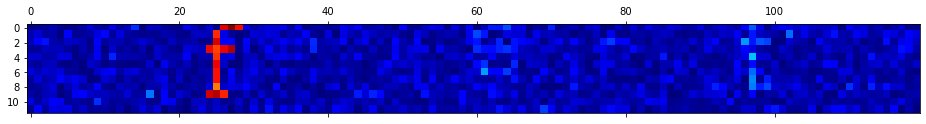

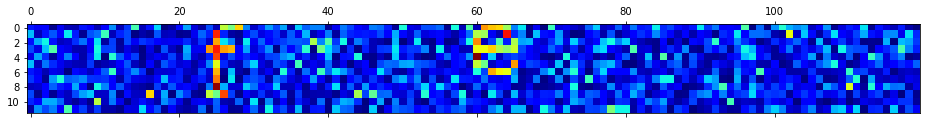

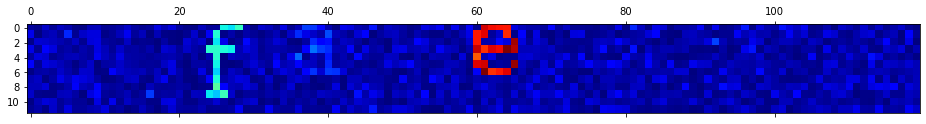

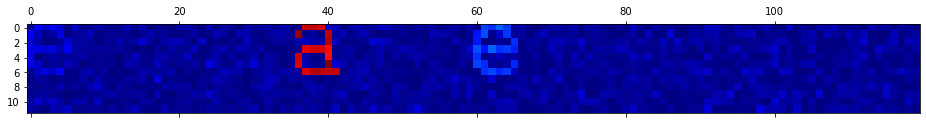

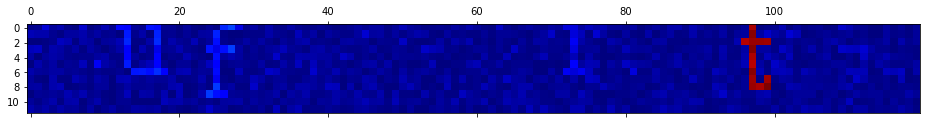

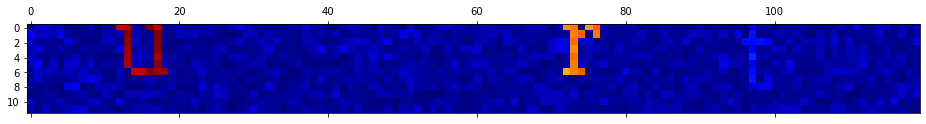

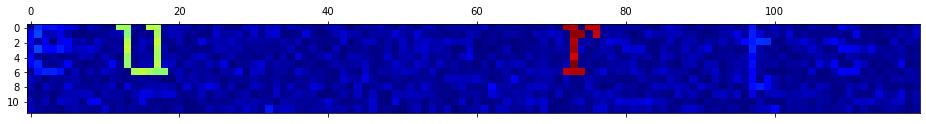

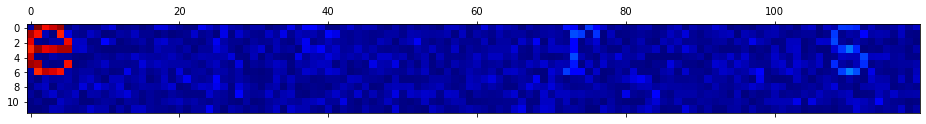

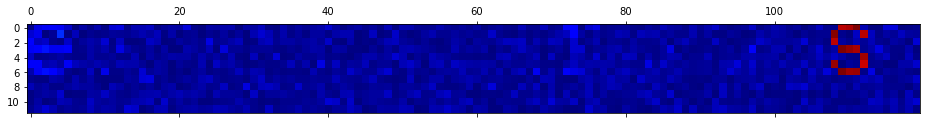

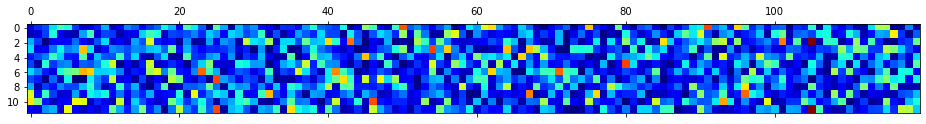

In [2]:
image_height=12
image_width=120
image_shape=(image_height,image_width)
datafilename='B_challenge_for_Chisom.hdf5'

from tables import *

# Create Sample/Row types
class WordImage(IsDescription):
    idnumber  = Int64Col()      # Signed 64-bit integer
    image = Float64Col(image_shape)    # double (double-precision)

# Create PCA dataset for individual student
ImagesFile = open_file(datafilename, mode = "r")
ImagesTable=ImagesFile.root.Images.Images

#d_img = np.zeros(image_shape)
new_array =list()
for x in ImagesTable.iterrows(1,3000):
    d_img= x['image'].reshape(1440,1)
    new_array.append(d_img)
    
stack_new_array = np.hstack(new_array)
pca = PCA()

PCA_array = pca.fit_transform(stack_new_array)
abs_value = np.absolute(PCA_array)

final_array = [abs_value[:,y].reshape(12,120)for y in range(10)]
for y in range(10):
    plt.matshow(final_array[y], interpolation='nearest', cmap=cm.jet)
    plt.show()



# # for x in ImagesTable.iterrows(0,4): # Start and stop are specified here, you need to process entire dataset!
# #     plt.matshow(x['image'], interpolation='nearest', cmap=cm.jet)
# #     plt.show()
    

In [4]:
ImagesTable.close()

# The letters spells out FEATURES. READ THE RED COLORS BECAUSE THEY APPEARED BRIGHTER THAN OTHER COLOURS